In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Specified point: (5, 5) -> Predicted: Strawberry


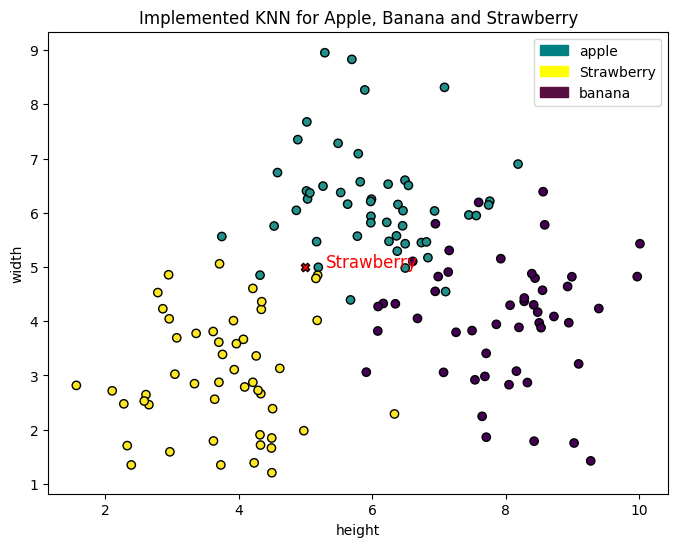

In [2]:
np.random.seed(47)

banana = np.random.randn(50, 2) + [8, 4]
apple = np.random.randn(50, 2) + [6, 6]
Strawberry = np.random.randn(50, 2) + [4, 3]

data = np.vstack((banana, apple, Strawberry))
labels = np.hstack((np.zeros(50), np.ones(50), np.full(50, 2)))

df = pd.DataFrame(data, columns=['height', 'width'])
df['Label'] = labels

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(df, new_point, k):
    distances = []
    for index, row in df.iterrows():
        dist = euclidean_distance(np.array([row['height'], row['width']]), new_point)
        distances.append((dist, row['Label']))
        distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]

    labels = [label for _, label in k_nearest]
    prediction = max(set(labels), key=labels.count)
    
    return prediction

# Choose a point:
specified_point = np.array([5, 5])
k = 3

prediction = knn_predict(df, specified_point, k)
label_name = ['Banana', 'Apple', 'Strawberry'][int(prediction)]
print(f"Specified point: ({specified_point[0]}, {specified_point[1]}) -> Predicted: {label_name}")

plt.figure(figsize=(8, 6))
plt.scatter(df['height'], df['width'], c=df['Label'], edgecolor='k')
plt.scatter(specified_point[0], specified_point[1], c='red', edgecolor='k', marker='X')
plt.text(specified_point[0] + 0.3, specified_point[1], label_name, color='red', fontsize=12)
plt.xlabel('height')
plt.ylabel('width')
plt.title('Implemented KNN for Apple, Banana and Strawberry')

Strawberry_patch = mpatches.Patch(color='yellow', label='Strawberry')
apple_patch = mpatches.Patch(color='teal', label='apple')
banana_patch = mpatches.Patch(color='#580F41', label='banana')
plt.legend(handles=[apple_patch,Strawberry_patch,banana_patch])
plt.show()